# mean variance, no short 

In [1]:
import os
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

In [2]:
import mylib as ml

In [5]:
stock_csv_folder = "C:/Users/yuxiang/Desktop/alpha/stocks/"
stock_csv_names = sorted(os.listdir(stock_csv_folder))
stocks = stock_csv_names[:5]

In [394]:
def get_returns(stock_csv_folder,stock_csv_names):
    ret=np.zeros((1,200),'float')
    stocks=[]
    for csv_name in stock_csv_names:
        df = ml.get_df(stock_csv_folder,csv_name)
        if len(df)<200:
            continue
        if df['Date'][len(df)-1].to_pydatetime().date() != dt.date.today():
            continue
        stocks.append(csv_name)
        r = np.array(df['ret'][-200:]).reshape(1,200)
        ret=np.vstack([ret,r])
    ret = ret[1:]
    return ret

def long_only_weights(N,num):
    weight = np.zeros((N,num))
    for j in range(N):
        for i in range(num-1):
            weight[j,i] = np.random.uniform(0,1-weight[j].sum())
    weight[:,-1] = 1-weight.sum(axis=-1)
    for i in range(N):
        np.random.shuffle(weight[i])
    return weight

def alloc(ret,cov,w):
    return ret.dot(w),np.sqrt(w.dot(cov.dot(w)))

#### returns

In [202]:
tickers=['AABA', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'AAWW', 'AAXJ', 'AAXN', 'ABCB', 'ABDC', 'ABEO', 'ABTX', 'ACAD', 'ACBI']

In [ ]:
tickers = ['IQ', 'BTEC', 'DBVT', 'CSWC', 'BICK', 'TOUR', 'LMST', 'DGRE', 'FAAR', 'ZIXI', 'RVNC', 'HIBB', 'BOOM', 'TBBK', 'DOGZ']

In [203]:
hold = [''.join([i,'.csv']) for i in tickers]

tempname = stocks[:5]
ret = ml.get_returns(stock_csv_folder,tempname)

In [204]:
ret2=ml.get_returns(stock_csv_folder,hold)
ret_mean = ret2.mean(axis=-1)
ret_std = ret2.std(axis=-1)
cov = np.cov(ret2)
len(ret2),len(ret_mean),len(ret_std),cov.shape


(15, 15, 15, (15, 15))

In [206]:
std_min, std_max = ret_std.min(), ret_std.max()
std_min, std_max

(0.012551605791537936, 0.04820901857937561)

In [207]:
ret_mean,ret_std

(array([-4.98837675e-04, -1.55061771e-03,  1.38777878e-19, -6.32217346e-03,
         1.61149911e-03, -6.56990080e-05, -1.90551081e-03, -4.58640643e-04,
        -9.10688671e-04, -2.49127138e-03,  6.17896037e-04, -4.03310681e-03,
        -1.14528614e-03,  2.08080214e-03, -7.61124209e-04]),
 array([0.01927843, 0.02688904, 0.04820902, 0.04088111, 0.01994617,
        0.02016339, 0.02415565, 0.01255161, 0.03089357, 0.01952993,
        0.0179412 , 0.04384768, 0.01636011, 0.0447667 , 0.01758298]))

#### weights

In [208]:
num=len(ret_mean)
N = 10000

In [209]:
weight = ml.long_only_weights(N,num)
weight[:5],weight.mean(axis=0),weight.sum(axis=-1),len(weight)

(array([[8.82873989e-05, 1.44513032e-04, 2.17606350e-01, 2.71102503e-06,
         4.91545700e-02, 4.23022906e-04, 2.15401264e-01, 1.85635800e-06,
         3.88277451e-01, 9.27473986e-03, 3.63691704e-03, 8.41246376e-05,
         1.65798521e-03, 7.26182231e-02, 4.16279839e-02],
        [3.59847371e-08, 9.80612306e-04, 1.16418050e-05, 1.77602247e-02,
         8.25528335e-08, 5.75879926e-01, 7.78043262e-02, 6.10808106e-08,
         8.92792697e-02, 3.85488386e-02, 1.99594432e-01, 1.59546535e-05,
         2.82813452e-06, 9.93226277e-05, 2.24444547e-05],
        [4.75848198e-07, 1.86771012e-07, 6.95444673e-06, 2.18656379e-04,
         3.34494570e-05, 2.35839811e-05, 9.45479899e-01, 7.77059809e-03,
         1.79617502e-05, 3.35437543e-02, 4.58971486e-06, 1.17145318e-02,
         4.52482807e-06, 1.86807512e-04, 9.94026013e-04],
        [3.97551743e-09, 4.92644304e-08, 1.45076187e-01, 2.36526983e-01,
         3.09482352e-01, 2.45061904e-07, 2.94460812e-05, 2.77313449e-01,
         1.07133672e-05

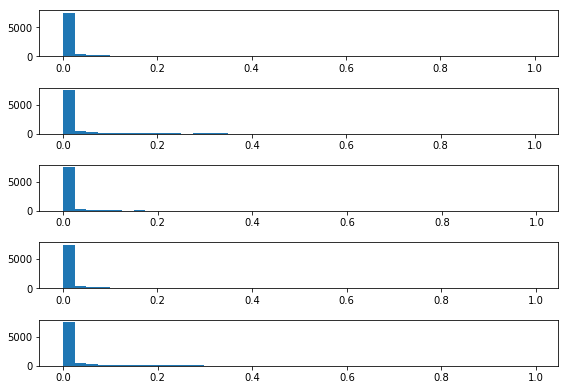

In [210]:
plt.figure(figsize=(8,6))
plt.subplot(5,1,1)
plt.hist(weight[:,0],bins=40)

plt.subplot(5,1,2)
plt.hist(weight[:,1],bins=40)

plt.subplot(5,1,3)
plt.hist(weight[:,2],bins=40)

plt.subplot(5,1,4)
plt.hist(weight[:,3],bins=40)

plt.subplot(5,1,5)
plt.hist(weight[:,4],bins=40)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### allocation

In [211]:
port = np.zeros((N,2))
for i in range(N):
    port[i]=ml.alloc(ret_mean,cov,weight[i])

#### efficient frontier

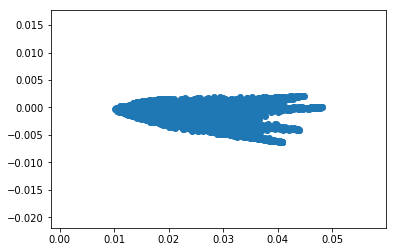

In [212]:
plt.scatter(port[:,1],port[:,0])

In [213]:
t = np.linspace(0,std_max,100)

In [214]:
efficient = np.zeros((len(t)-1,2))
for i in range(len(t)-1):
    try:
        con = np.asarray(t[i]<port[:,1]) & np.asarray(t[i+1]>port[:,1])
        port_con = port.T[:,con].T
        #efficient[i]=port_con.max(axis=0)  ## mind max usage
        efficient[i]=port_con.T[:,port_con[:,0]==port_con[:,0].max()].T
    except:
        pass

In [215]:
efficient_after = efficient.T[:,efficient.sum(axis=-1)>0].T

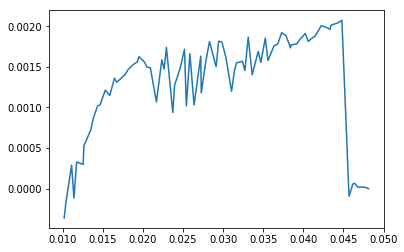

In [216]:
plt.plot(efficient_after[:,1],efficient_after[:,0])

#### portfolio weight

In [245]:
subport = efficient_after.T[:,(efficient_after[:,1]<0.020) & (efficient_after[:,1]>0.015)].T
subport

array([[0.00121582, 0.01533656],
       [0.00114825, 0.01588333],
       [0.00136214, 0.01647442],
       [0.00131101, 0.01675852],
       [0.00137595, 0.01747595],
       [0.00141411, 0.01785965],
       [0.00146662, 0.01815313],
       [0.00153139, 0.01883642],
       [0.00156054, 0.01929717],
       [0.00162819, 0.0195262 ]])

In [246]:
std=0.0195

In [247]:
port

array([[-0.00058883,  0.01907738],
       [-0.00035379,  0.0156137 ],
       [-0.00193772,  0.02345751],
       ...,
       [-0.00129874,  0.02152708],
       [-0.00211362,  0.01807002],
       [-0.00379672,  0.02513544]])

In [248]:
temp = np.abs(efficient[:,1]-std)
max_port= efficient.T[:,temp==np.min(temp)].T
max_port

array([[0.00162819, 0.0195262 ]])

In [249]:
port.T[:,(port[:,1]==max_port[:,1]) & (port[:,0]==max_port[:,0])].T

array([[0.00162819, 0.0195262 ]])

In [250]:
ind = np.where((port[:,1]==max_port[:,1]) & (port[:,0]==max_port[:,0]))[0]

w1

In [261]:
w = weight[ind].flatten() ; w

array([5.04147259e-03, 7.43086455e-04, 2.42220120e-06, 5.39231667e-06,
       9.06710676e-01, 1.59147607e-04, 1.25871489e-06, 1.37755693e-06,
       4.54057428e-08, 6.09309632e-04, 2.74757395e-06, 7.32312776e-04,
       2.38753994e-06, 8.46842692e-02, 1.30409405e-03])

In [252]:
ml.alloc(ret_mean,cov,w)

(0.001628194851749721, 0.01952619581657186)

w2

In [266]:
w2 = np.where(w>1e-03,w,0) 
w2 = w2/w2.sum(); w2

array([0.00505289, 0.        , 0.        , 0.        , 0.90876402,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08487605, 0.00130705])

In [267]:
ml.alloc(ret_mean,cov,w2)

(0.0016375672646318858, 0.019540813318006438)

In [272]:
for i in np.where(w2!=0)[0]:
    print(tickers[i])

AABA
AAON
ACAD
ACBI


In [273]:
w2*100

array([ 0.50528895,  0.        ,  0.        ,  0.        , 90.87640176,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  8.48760456,  0.13070473])

w3

In [268]:
w3 = np.where(w>1e-02,w,0) 
w3 = w3/w3.sum(); w3

array([0.        , 0.        , 0.        , 0.        , 0.91458069,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08541931, 0.        ])

In [269]:
ml.alloc(ret_mean,cov,w3)

(0.0016515866484127556, 0.019613534782262843)

In [3]:
r,std =0.0016375672646318858*252,0.019540813318006438*252**0.5

In [4]:
r,std,r/std

(0.4126669506872352, 0.31020079473230366, 1.3303220291339277)

In [253]:
len(weight),len(port),len(ret.T),len(cov.T)

(10000, 10000, 200, 15)